<a href="https://colab.research.google.com/github/webcoder123/Machine-Learning_Project/blob/main/Woman_cloth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!pip install nltk


Import all moduls

In [41]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

This is a Woman clothing data


In [9]:
cloth=pd.read_csv('/content/drive/MyDrive/All Data/Womens Clothing E-Commerce Reviews.csv')

In [10]:
cloth.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [14]:
cloth.info()
cloth.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [12]:
cloth.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [15]:
cloth.dropna(axis=0,inplace=True)
cloth.drop(['Unnamed: 0'],1,inplace=True)
print(cloth.isnull().sum())
cloth.shape

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


<ipython-input-15-e8c18d78d039>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cloth.drop(['Unnamed: 0'],1,inplace=True)


(19662, 10)

In [18]:
print((cloth['Division Name'].value_counts()/(cloth['Division Name'].value_counts().sum()))*100)
print((cloth['Department Name'].value_counts()/(cloth['Department Name'].value_counts().sum()))*100)
print((cloth['Class Name'].value_counts()/(cloth['Class Name'].value_counts().sum()))*100)

General           59.322551
General Petite    34.472587
Initmates          6.204862
Name: Division Name, dtype: float64
Tops        44.313905
Dresses     27.316651
Bottoms     16.193673
Intimate     7.161021
Jackets      4.470552
Trend        0.544197
Name: Department Name, dtype: float64
Dresses           27.316651
Knits             20.247177
Blouses           13.157359
Sweaters           6.194690
Pants              5.884447
Jeans              4.933374
Fine gauge         4.714678
Skirts             4.048418
Jackets            3.041400
Lounge             2.919337
Swim               1.490184
Outerwear          1.429153
Shorts             1.322348
Sleep              0.884956
Legwear            0.666260
Intimates          0.610314
Layering           0.584885
Trend              0.544197
Casual bottoms     0.005086
Chemises           0.005086
Name: Class Name, dtype: float64


# It no longer provided any value after NUM_Negative feedbacks was bo longer userful

<ipython-input-23-8ab1cd244162>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cloth['Age'])


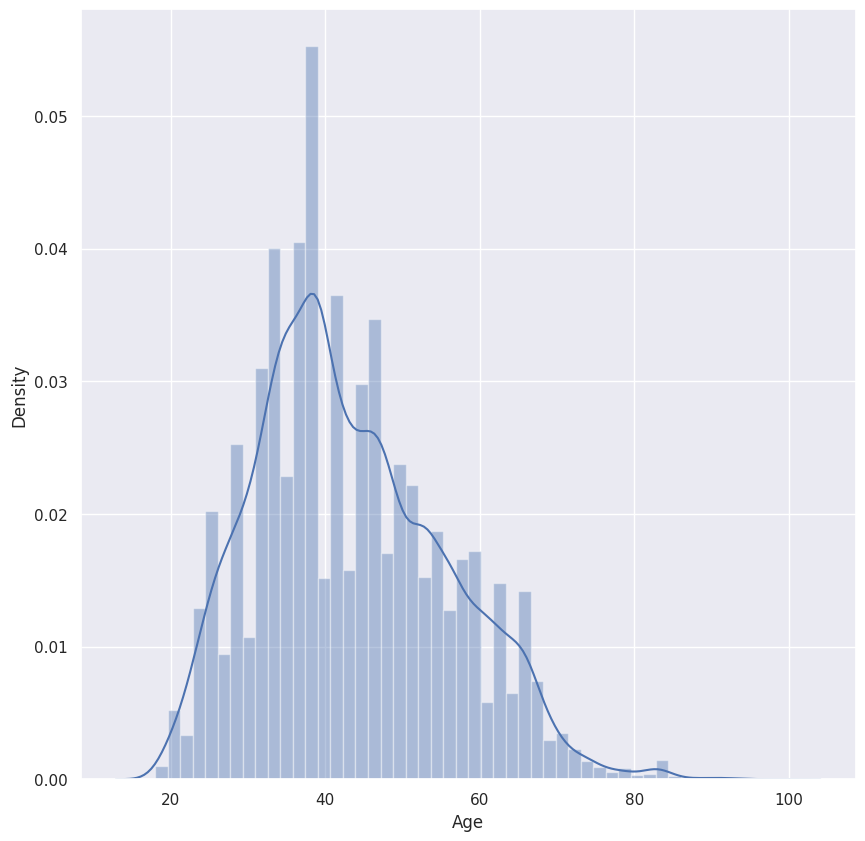

In [23]:
sns.distplot(cloth['Age'])
sns.set(rc={'figure.figsize':(10,10)})

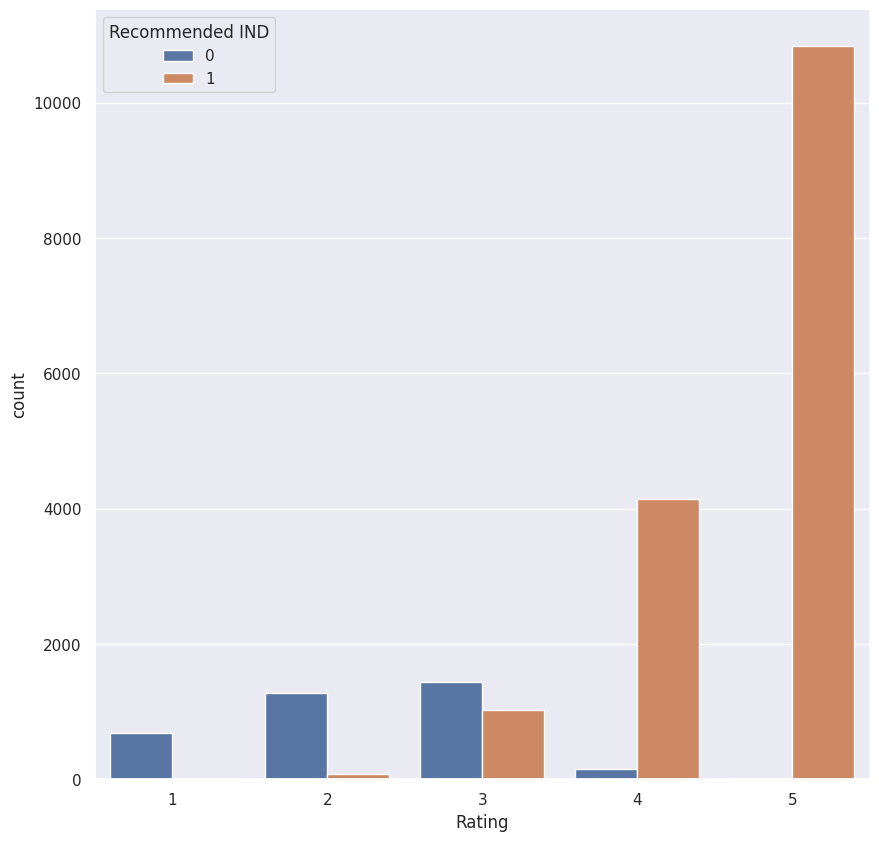

In [24]:
sns.countplot(x='Rating', hue='Recommended IND',data=cloth)
sns.set(rc={'figure.figsize':(10,20)})

In [25]:
cloth['Rating'].value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

<ipython-input-26-8836cd604036>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


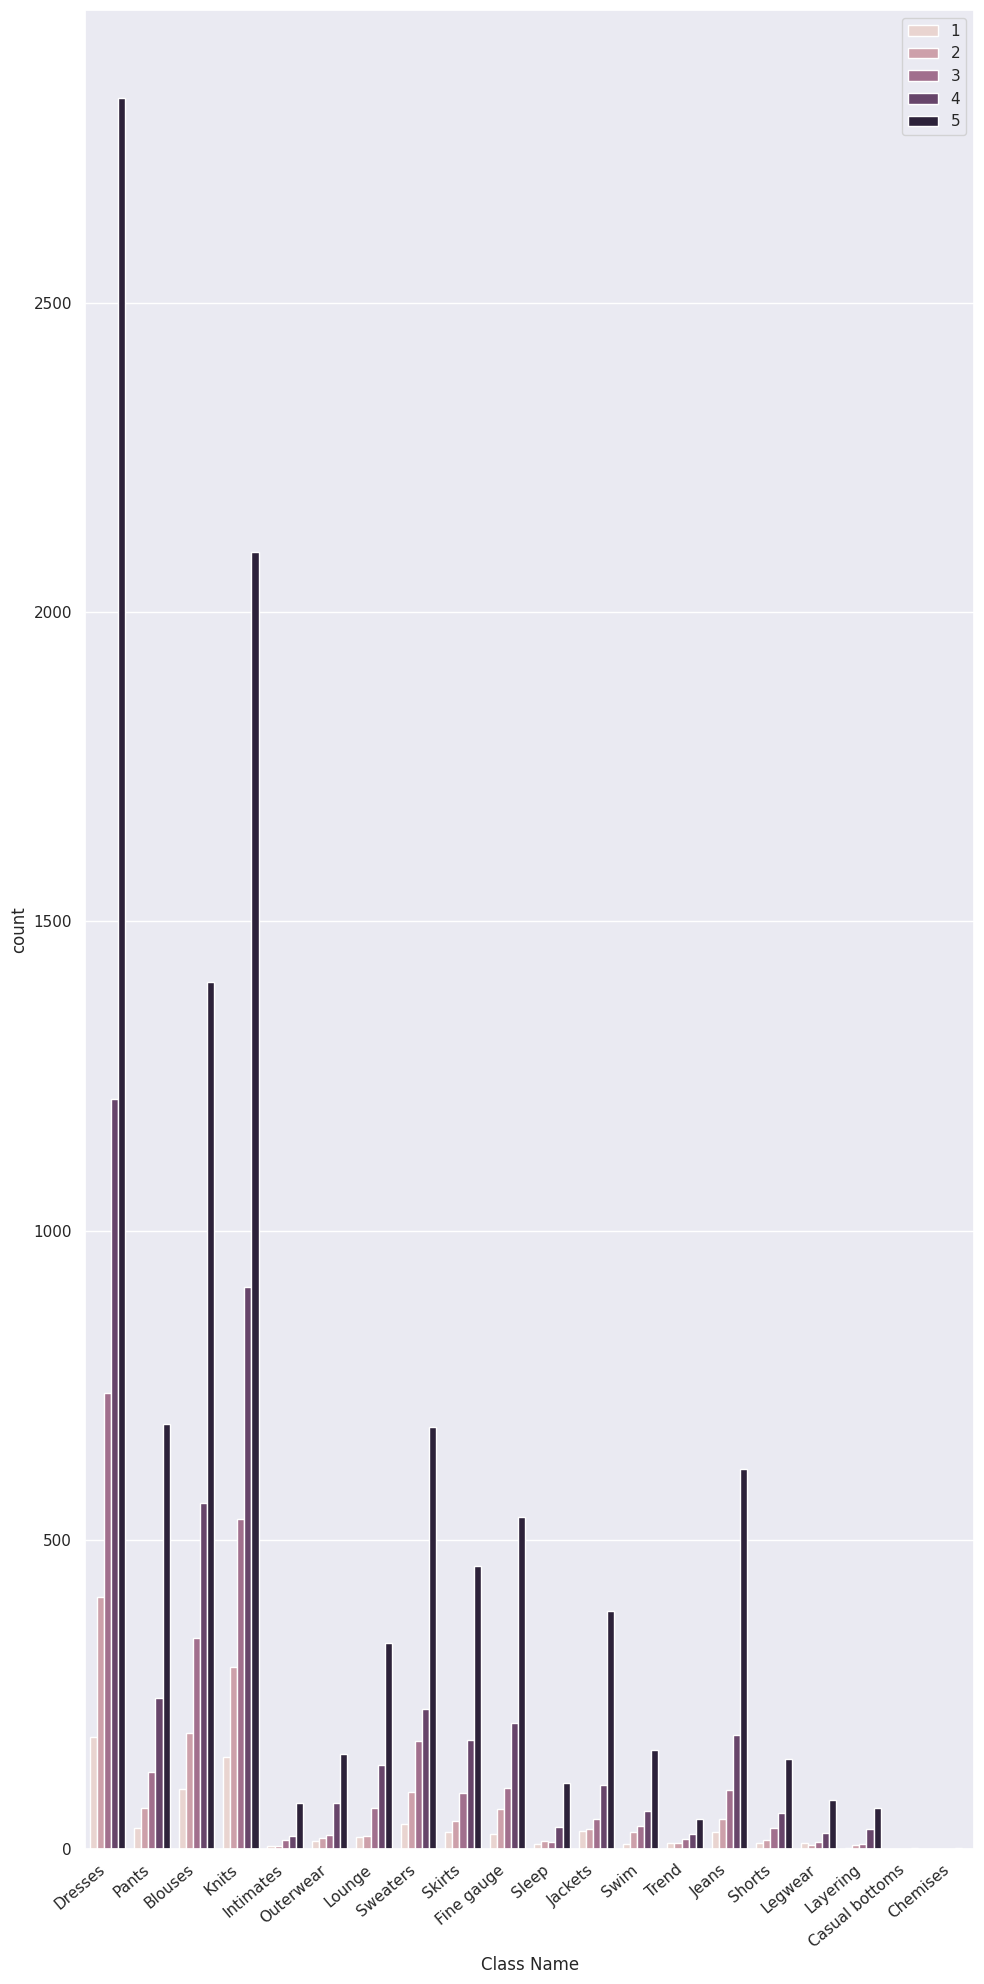

In [26]:
ax=sns.countplot(x="Class Name",hue='Rating',data=cloth)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(10,10)})

<ipython-input-27-a4314367b8c1>:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax=sns.violinplot(x='Division Name',y='Positive Feedback Count',hue='Recommended IND',data=cloth,scale='count')
<ipython-input-27-a4314367b8c1>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


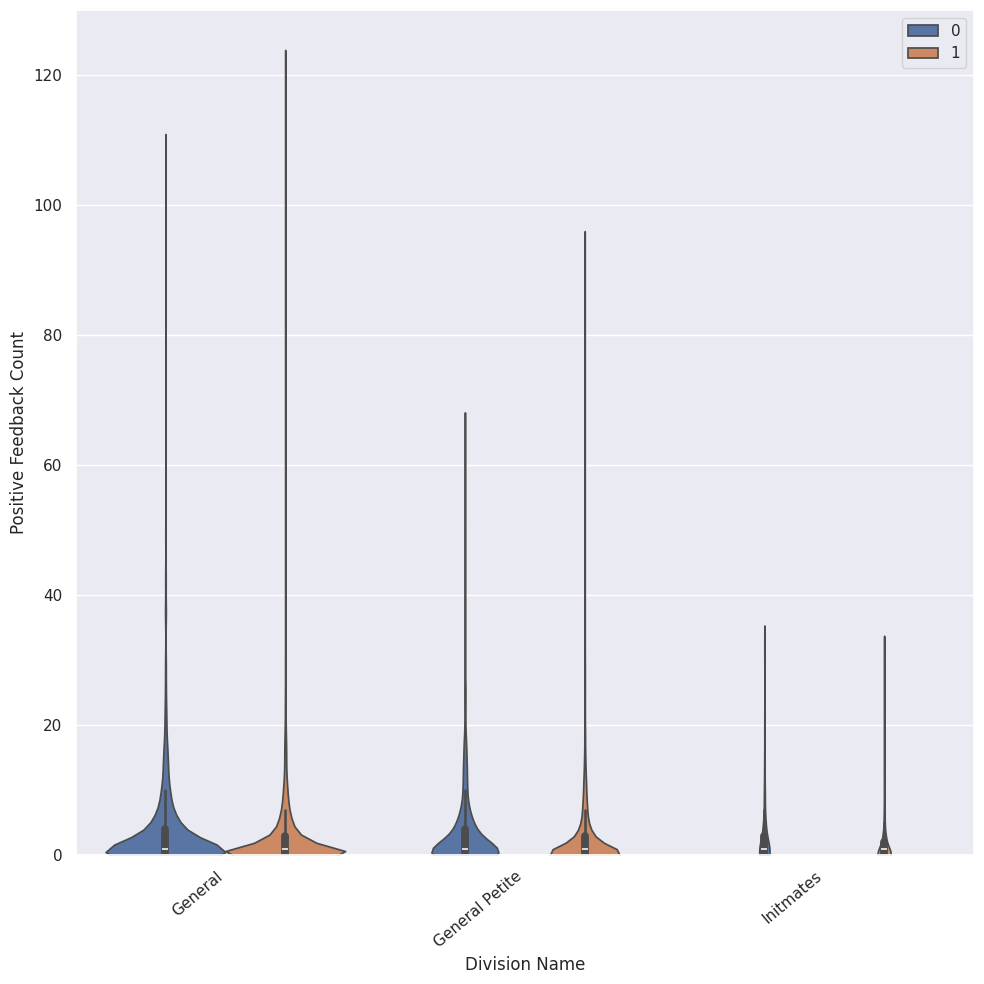

In [27]:
ax=sns.violinplot(x='Division Name',y='Positive Feedback Count',hue='Recommended IND',data=cloth,scale='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
ax.set(ylim=(0, 130))
sns.set(rc={'figure.figsize':(10,10)})

<ipython-input-29-23339a11f069>:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax=sns.violinplot(x='Department Name',y='Positive Feedback Count',hue='Recommended IND',data=cloth,scale='count')
<ipython-input-29-23339a11f069>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


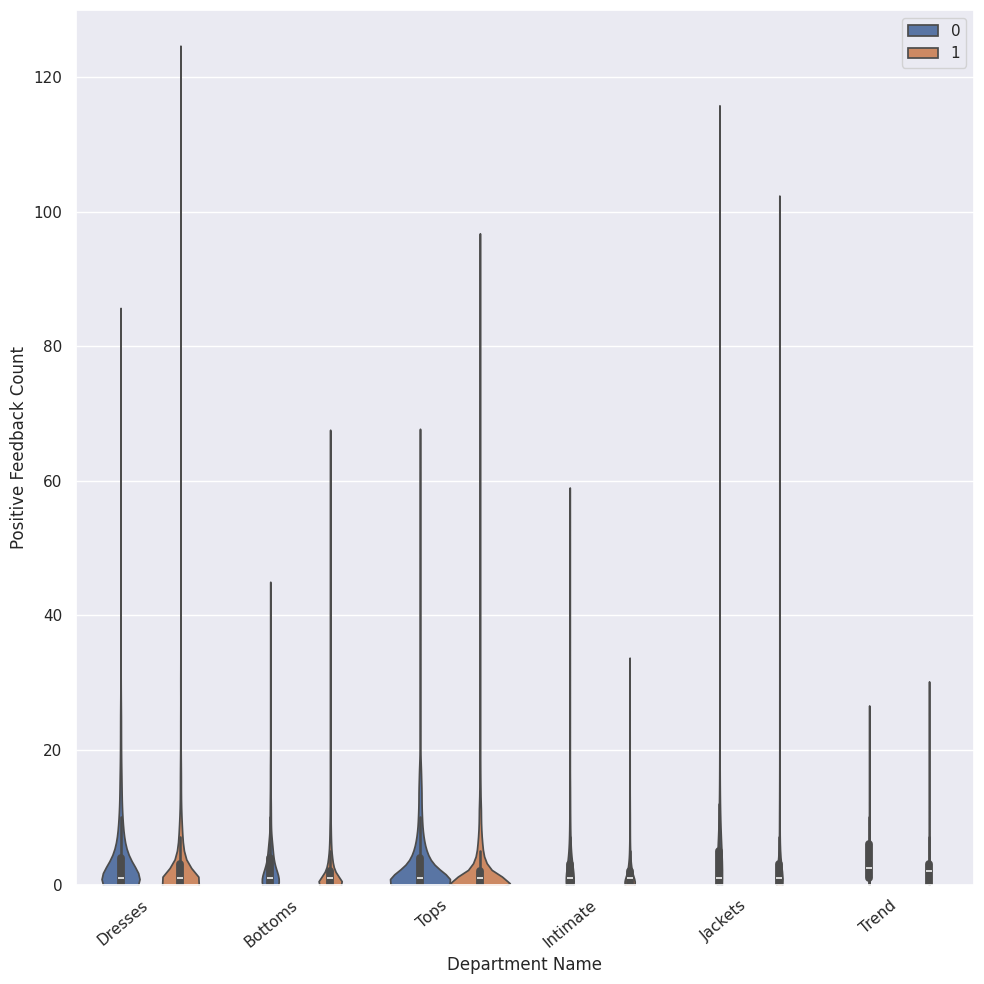

In [29]:
ax=sns.violinplot(x='Department Name',y='Positive Feedback Count',hue='Recommended IND',data=cloth,scale='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
ax.set(ylim=(0, 130))
sns.set(rc={'figure.figsize':(10,10)})

<ipython-input-30-60c7d2967e2a>:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax=sns.violinplot(x='Class Name',y='Positive Feedback Count',hue='Recommended IND',data=cloth,scale='count')
<ipython-input-30-60c7d2967e2a>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


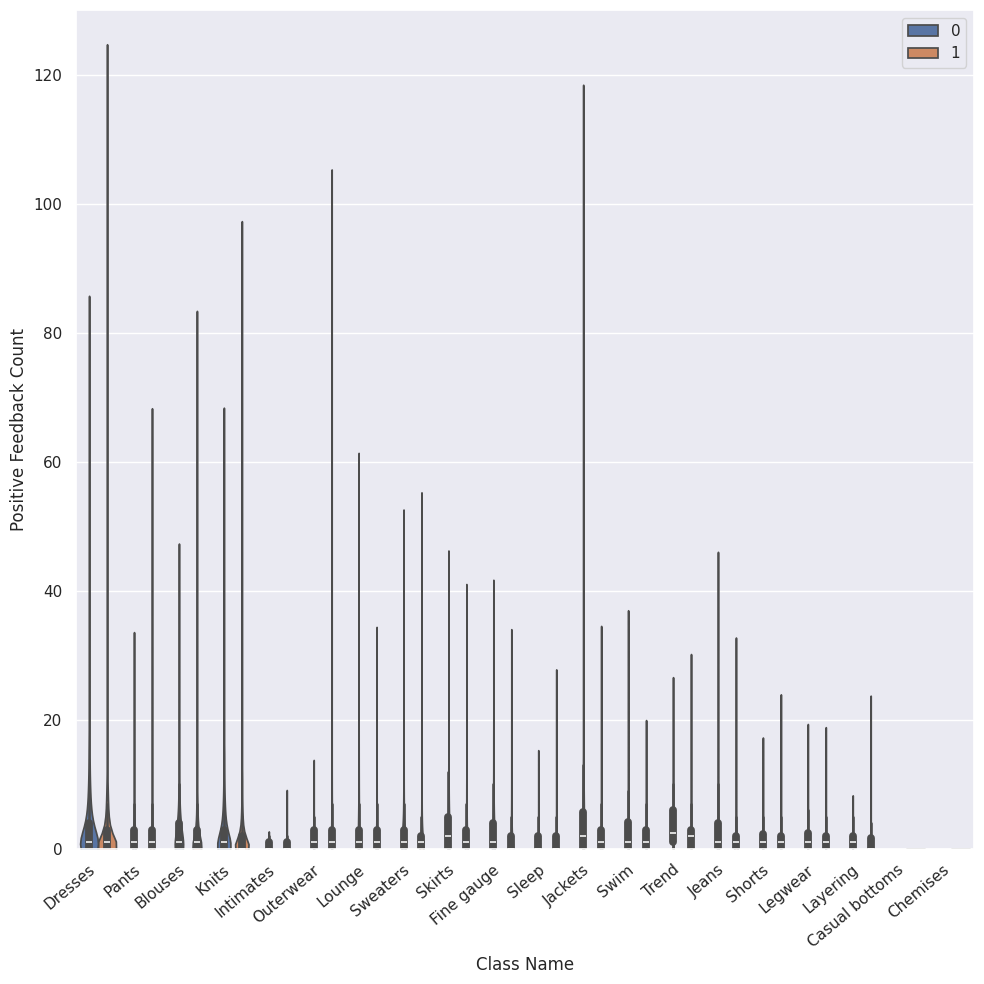

In [30]:
ax=sns.violinplot(x='Class Name',y='Positive Feedback Count',hue='Recommended IND',data=cloth,scale='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
ax.set(ylim=(0, 130))
sns.set(rc={'figure.figsize':(10,10)})

In [31]:
print('Positive Feed Count by Recommendation')
print(cloth['Positive Feedback Count'].groupby(cloth['Recommended IND']).describe())

Positive Feed Count by Recommendation
                   count      mean       std  min  25%  50%  75%    max
Recommended IND                                                        
0                 3575.0  3.388252  6.613545  0.0  0.0  1.0  4.0  108.0
1                16087.0  2.488966  5.633717  0.0  0.0  1.0  3.0  122.0


**TEXT ANALYSIS**

After reviewing the comments, they all are similiar in nature. Most of them mention colors, clothing sizes, and fit.here are misspelled words, however the overall style and nature of the reviews is consistent to move forward with needing to clean much. One noticeable thing was that reviews had a character limit with some being cutoff.

**Original Text**

In [42]:
cloth['tokenized_sents'] = cloth.apply(lambda row: nltk.word_tokenize(row['Review Text']), axis=1)
cloth['sents_length'] = cloth.apply(lambda row: len(row['tokenized_sents']), axis=1)

<ipython-input-46-1e31b8cfcc86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(cloth[cloth['Recommended IND']==0]['sents_length'])
<ipython-input-46-1e31b8cfcc86>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(cloth[cloth['Recommended IND']==1]['sents_length'],color='r')


,count,mean,std,min,25%,50%,75%,max
Recommended IND,,,,,,,,
0,3575.0,73.239720,30.511612,4.0,48.0,74.0,103.0,139.0
1,16087.0,71.351029,32.576223,2.0,44.0,71.0,104.0,133.0


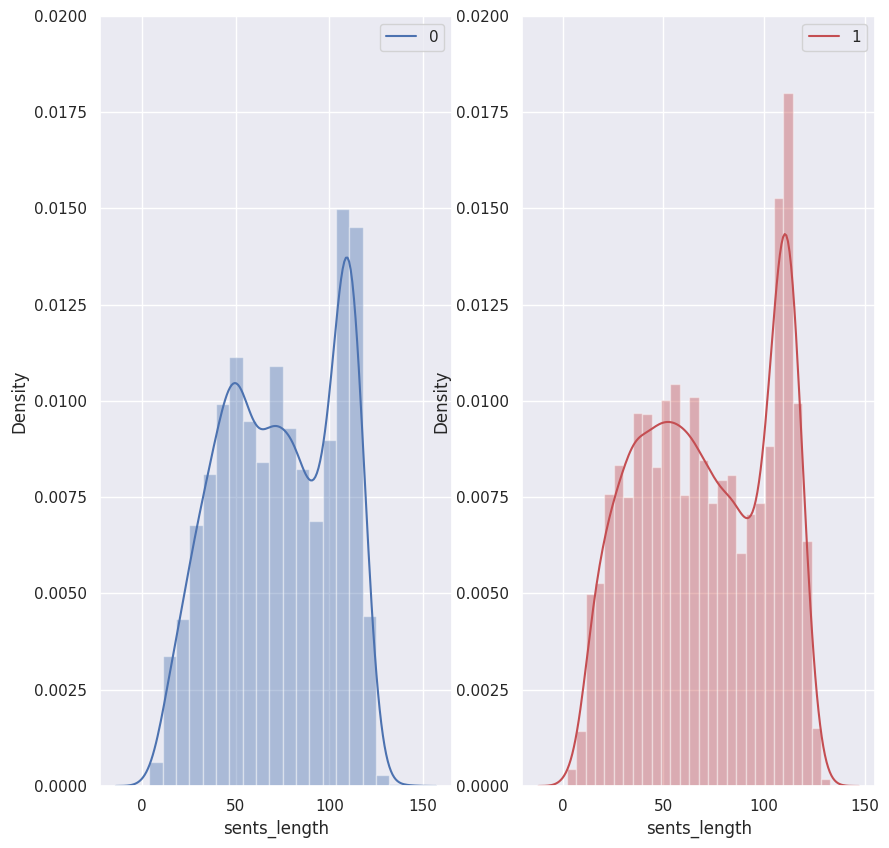

In [46]:
plt.subplot(1,2,1)
ax=sns.distplot(cloth[cloth['Recommended IND']==0]['sents_length'])
plt.legend(loc='upper right',labels=[0])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

plt.subplot(1,2,2)
ax=sns.distplot(cloth[cloth['Recommended IND']==1]['sents_length'],color='r')
plt.legend(loc='upper right',labels=[1])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

cloth['sents_length'].groupby(cloth['Recommended IND']).describe()

<ipython-input-47-04d30caa4000>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(cloth[cloth['Rating']==1]['sents_length'])
<ipython-input-47-04d30caa4000>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(cloth[cloth['Rating']==2]['sents_length'])
<ipython-input-47-04d30caa4000>:9: UserWar

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1,691.0,69.726483,30.550014,4.0,46.0,69.0,99.00,124.0
2,1360.0,73.214706,30.664163,9.0,47.0,74.0,102.25,139.0
3,2464.0,76.073052,30.691429,5.0,51.0,77.0,106.00,133.0
4,4289.0,75.051527,32.368713,3.0,48.0,76.0,107.00,129.0
5,10858.0,69.309541,32.560697,2.0,41.0,67.0,101.00,131.0


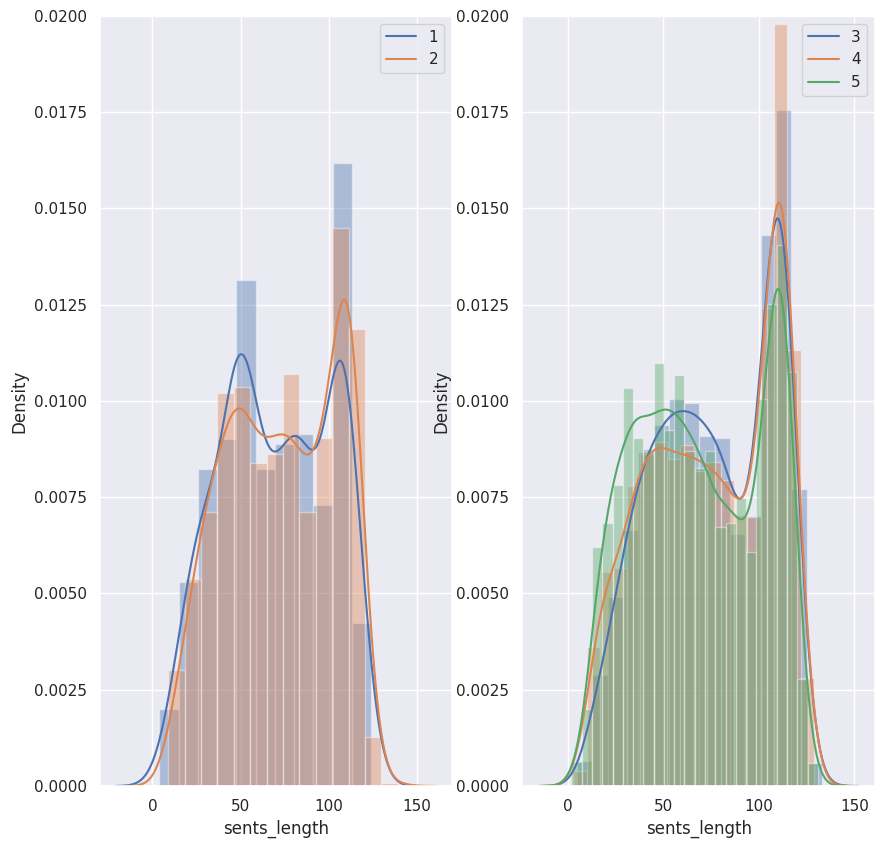

In [47]:
plt.subplot(1,2,1)
ax=sns.distplot(cloth[cloth['Rating']==1]['sents_length'])
ax=sns.distplot(cloth[cloth['Rating']==2]['sents_length'])
plt.legend(loc='upper right',labels=[1,2])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

plt.subplot(1,2,2)
ax=sns.distplot(cloth[cloth['Rating']==3]['sents_length'])
ax=sns.distplot(cloth[cloth['Rating']==4]['sents_length'])
ax=sns.distplot(cloth[cloth['Rating']==5]['sents_length'])
plt.legend(loc='upper right',labels=[3,4,5])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

cloth['sents_length'].groupby(cloth['Rating']).describe()